# Load Modules and Data Required

#### Import Modules

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,15))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade= True) #
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

#### Load Data File

In [3]:
Results = 'Data/P22toP51ResultsFile.xlsx'
pX_Results = [pd.read_excel(Results)]
#pX_Results
Results_DF = pd.concat(pX_Results)

#### Generate List of Participants & Length of Trials

In [4]:
participant = Results_DF['Session_Name_'].unique() #get unique participant IDs
#participant = participant[14:]
trial_n = Results_DF['Trial_Index_'].unique() #get unique trial indeces
print("Number of participants:", len(participant))
print ("Number of trials:", len(trial_n))


Number of participants: 30
Number of trials: 280


#### Take P22:P30

In [5]:
columns = list(Results_DF)
Results_Stripped = pd.DataFrame(columns=columns)

for i in range(len(participant)):
    ResultsDFtemp = Results_DF.loc[Results_DF['Session_Name_'] == participant[i]]
    
    Results_Stripped = pd.concat([Results_Stripped, ResultsDFtemp])

In [6]:
Results_Stripped

,Session_Name_,Trial_Index_,DOTS_LEFT,DOTS_RIGHT,CHOICE_KEYPRESS,CHOICE_RT,CONF,CONF_RT,moreorless,trial_type,...,Chosen_Nr,Trial_Recycled_,base,BlockType,rest,pairid,lorr,PairIDFM,Unnamed: 37,Unnamed: 38
0,P22,1,50,40,z,3836.81,94,2729.66,LESS,Practice1,...,50,False,50,FEWEST,No,0,LEFT,LEFT,NaN,NaN
1,P22,2,42,50,m,6228.76,74,3238.83,LESS,Practice1,...,50,False,50,FEWEST,No,0,RIGHT,RIGHT,NaN,NaN
2,P22,3,50,54,m,8686.63,54,2317.57,LESS,Practice1,...,54,False,50,FEWEST,No,0,LEFT,LEFT,NaN,NaN
3,P22,4,56,50,m,8963.74,54,1377.45,LESS,Practice1,...,50,False,50,FEWEST,No,0,RIGHT,RIGHT,NaN,NaN
4,P22,5,50,45,m,2653.37,14,3248.91,LESS,Practice1,...,45,False,50,FEWEST,No,0,LEFT,LEFT,NaN,NaN
5,P22,6,53,50,z,3622.10,64,1710.82,LESS,Practice1,...,53,False,50,FEWEST,No,0,RIGHT,RIGHT,NaN,NaN
6,P22,7,50,46,m,9015.30,54,1140.12,LESS,Practice1,...,46,False,50,FEWEST,No,0,LEFT,LEFT,NaN,NaN
7,P22,8,43,50,z,10348.07,44,1695.10,LESS,Practice1,...,43,False,50,FEWEST,No,0,RIGHT,RIGHT,NaN,NaN
8,P22,9,50,48,m,8040.83,34,2213.83,LESS,Practice1,...,48,False,50,FEWEST,No,0,LEFT,LEFT,NaN,NaN
9,P22,10,55,50,m,7147.79,44,1343.72,NEXTMORE,Practice1,...,50,False,50,FEWEST,No,0,RIGHT,RIGHT,NaN,NaN


# Loading Pilot Data
## Load Eyetracker reports from Eyelink Data Viewer
### Loading Interest Area (IA) and Saccade (Sacc) reports

In [7]:
#Select path for IA and Sacc
pathIA ="Data/P22_to_P51IAReport.xls"
pathSacc ="Data/P22_to_P51SacReport.xls"
# load csv for IA and Sacc
pX_IAdata = [pd.read_csv(pathIA, sep="\t")]
pX_SACCdata = [pd.read_csv(pathSacc, sep="\t")]
# Concatenate to generate frames
IAdata = pd.concat(pX_IAdata)
SACCdata = pd.concat(pX_SACCdata)
#print(IAdata)

#### DF w/ interest area information

In [8]:
IAdata

,DATA_FILE,IA_ID,Trial_Index_,pairid,trial_type,DOTS_LEFT,DOTS_RIGHT,CHOICE_KEYPRESS,CHOICE_RT,CONF,...,IA_DWELL_TIME,IA_DWELL_TIME_%,IA_FIXATION_COUNT,IA_FIXATION_%,IA_MAX_FIX_PUPIL_SIZE,IA_AVERAGE_FIX_PUPIL_SIZE,IA_MIN_FIX_PUPIL_SIZE,IA_RUN_COUNT,TRIAL_DWELL_TIME,TRIAL_FIXATION_COUNT
0,P22.edf,1,1,0,Practice1,50,40,z,3836.809,94,...,2048,0.5870,3,0.3333,3650.00,3606.00,3561.00,2,3489.0,9
1,P22.edf,2,1,0,Practice1,50,40,z,3836.809,94,...,736,0.2109,2,0.2222,3569.00,3541.50,3514.00,1,3489.0,9
2,P22.edf,3,1,0,Practice1,50,40,z,3836.809,94,...,0,0.0000,0,0.0000,.,.,.,0,3489.0,9
3,P22.edf,1,2,0,Practice1,42,50,m,6228.756,74,...,2926,0.5157,7,0.5000,3708.00,3496.71,3328.00,2,5674.0,14
4,P22.edf,2,2,0,Practice1,42,50,m,6228.756,74,...,2486,0.4381,6,0.4286,3445.00,3340.17,3294.00,2,5674.0,14
5,P22.edf,3,2,0,Practice1,42,50,m,6228.756,74,...,0,0.0000,0,0.0000,.,.,.,0,5674.0,14
6,P22.edf,1,3,0,Practice1,50,54,m,8686.632,54,...,4494,0.5860,12,0.5714,3951.00,3647.67,3421.00,2,7669.0,21
7,P22.edf,2,3,0,Practice1,50,54,m,8686.632,54,...,2943,0.3838,8,0.3810,3650.00,3540.50,3446.00,2,7669.0,21
8,P22.edf,3,3,0,Practice1,50,54,m,8686.632,54,...,0,0.0000,0,0.0000,.,.,.,0,7669.0,21
9,P22.edf,1,4,0,Practice1,56,50,m,8963.741,54,...,4714,0.6138,16,0.6957,4743.00,4271.31,4051.00,3,7680.0,23


#### SF w/ saccade information

In [9]:
SACCdata

,DATA_FILE,RECORDING_SESSION_LABEL,TRIAL_INDEX,Trial_Index_,CURRENT_SAC_END_INTEREST_AREA_ID,CURRENT_SAC_START_INTEREST_AREA_ID,trial_type
0,P22.edf,P22,1,1,.,.,Practice1
1,P22.edf,P22,1,1,.,.,Practice1
2,P22.edf,P22,1,1,1,.,Practice1
3,P22.edf,P22,1,1,1,1,Practice1
4,P22.edf,P22,1,1,2,1,Practice1
5,P22.edf,P22,1,1,2,2,Practice1
6,P22.edf,P22,1,1,1,2,Practice1
7,P22.edf,P22,1,1,.,1,Practice1
8,P22.edf,P22,2,2,1,.,Practice1
9,P22.edf,P22,2,2,1,1,Practice1


In [10]:
participant = IAdata['DATA_FILE'].unique()
participant_names = IAdata['DATA_FILE'].unique()

#Extract just names of participant (for folder name in future steps)
#yy=0
#for xx in participant_names:
    #participant_names[yy]=xx.rstrip(".edf")
    #yy+=1
print (participant_names)

percpart = participant_names #take participants who had DeltaVal as a percentage

trial_n = IAdata['Trial_Index_'].unique()

print("Number of participants:", len(participant))
print ("Number of trials:", len(trial_n))

['P22.edf' 'P23.edf' 'P24.edf' 'P25.edf' 'P26.edf' 'P27.edf' 'P28.edf'
 'P29.edf' 'P30.edf' 'P31.edf' 'P32.edf' 'P33.edf' 'P34.edf' 'P35.edf'
 'P36.edf' 'P37.edf' 'P38.edf' 'P39.edf' 'P40.edf' 'P41.edf' 'P42.edf'
 'P43.edf' 'P44.edf' 'P45.edf' 'P46.edf' 'P47.edf' 'P48.edf' 'P49.edf'
 'P50.edf' 'P51.edf']
Number of participants: 30
Number of trials: 280


## Calculate GSF for each participant and trial

In [11]:
i=0
GSF_matrix = []

#Run for each individual participant
for i in range(len(percpart)):
    #Extract the number of trials for this participant
    #pX_indSubj = SACCdata.loc[(SACCdata['DATA_FILE']==participant[i]) & (SACCdata['trial_type']== 'Experiment')]
    #Add number of trials for the experiment
    #trial_n = pX_indSubj['trial'].unique()
    trial_n = range(240)
    for  j in range(len(trial_n)):
            # extract saccade data for this participant
            GSF_data=SACCdata.loc[(SACCdata['DATA_FILE']==percpart[i]) & (SACCdata['TRIAL_INDEX']== j) & (SACCdata['trial_type']== 'Experiment')]


            # considered direct glance transition between IA 1 (left) and IA 2 (right)
            booatstart_p1=GSF_data['CURRENT_SAC_START_INTEREST_AREA_ID'] == '2'
            booatend_p1=GSF_data['CURRENT_SAC_END_INTEREST_AREA_ID'] == '1'
            booatstart_p2=GSF_data['CURRENT_SAC_START_INTEREST_AREA_ID'] == '1'
            booatend_p2=GSF_data['CURRENT_SAC_END_INTEREST_AREA_ID'] == '2'            
            
            #Count shift only if the saccade goes from one area to the other (right to left or left to right item)
            shifts_p1= booatstart_p1 & booatend_p1
            shifts_p2= booatstart_p2 & booatend_p2

            shifts_total = shifts_p1 | shifts_p2
            #Count the total number of shifts in this trial
            trialGSF = sum(shifts_total*1)
            
            #Extract the region (left or right) for the last fixation
            go_back = 1
            tail_fix = GSF_data['CURRENT_SAC_END_INTEREST_AREA_ID'].tail(go_back)  
            
            # If we have not fixation information we don't skip it, we fill with zeros
            #if GSF_data.empty:
                #print ('skipped: participant:',participant[i],'TRIAL_INDEX',j+1)
                #continue
            
            ## If the sequence is empty, we assign 0 to tail
            if tail_fix.empty:
                tail_fix = 0
            else:
                tail_fix = tail_fix.values[0]
            
            while ('.'== tail_fix) | ('3'== tail_fix):
                go_back = go_back + 1
                tail_fix = GSF_data['CURRENT_SAC_END_INTEREST_AREA_ID'].tail(go_back)
                #Since tail gets the last n subjects we need to just pick the one on top
                tail_fix_aux = tail_fix.values
                tail_fix = tail_fix_aux[0]
            
            #add GSF trial info to a new row if the matrix
            GSF_matrix.append([percpart[i], j+1, trialGSF, tail_fix]) #trial number, trial GSF, last_fixation

# Calculate DDT for each participant and trial
## Extract measures of dwelll time (DT) Per interest area (IA) in each trial

In [12]:
# IA1: left item ; IA2 : right item ; IA3: condition icon
IA1_data=IAdata.loc[(IAdata['DATA_FILE']==percpart[i]) & (IAdata['Trial_Index_']== j+1) & (IAdata['IA_ID']== 1) & (IAdata['trial_type']== 'Experiment')]
IA2_data=IAdata.loc[(IAdata['DATA_FILE']==percpart[i]) & (IAdata['Trial_Index_']== j+1) & (IAdata['IA_ID']== 2) & (IAdata['trial_type']== 'Experiment')]
IA3_data=IAdata.loc[(IAdata['DATA_FILE']==percpart[i]) & (IAdata['Trial_Index_']== j+1) & (IAdata['IA_ID']== 3) & (IAdata['trial_type']== 'Experiment')]

print ("Information contained in IA report ")
#list(IA1_data)
#print(IA1_data)

Information contained in IA report 


In [13]:
i=0
DDT_matrix = []


#Extract information for each participant. Behavioural parameters also extracted from this report.
for i in range(len(percpart)):
    #pX_indSubj = IAdata.loc[(IAdata['DATA_FILE']==participant[i]) & (pX_IAdata['trial_type']== 'Experiment')]
    #Add number of trials for the experiment
    #trial_n = pX_indSubj['trial'].unique()
    trial_n = range(240)
    for  j in range(len(trial_n)):
            #Extract DT information for the trial IA1 :left ; IA2 : right
            IA1_data=IAdata.loc[(IAdata['DATA_FILE']==percpart[i]) & (IAdata['Trial_Index_']== j+41) & (IAdata['IA_ID']== 1) & (IAdata['trial_type']== 'Experiment')]
            IA2_data=IAdata.loc[(IAdata['DATA_FILE']==percpart[i]) & (IAdata['Trial_Index_']== j+41) & (IAdata['IA_ID']== 2) & (IAdata['trial_type']== 'Experiment')]
            #print(IA1_data)

            #Save additional behavioural parameters
            trial_PairID = pd.to_numeric(IA1_data['pairid'].values[0])
            #trial_LL_Item = IA1_data['LL_Item'][0]
            trial_LL_Value = pd.to_numeric(IA1_data['DOTS_LEFT'].values[0])
            #trial_LR_Item = IA1_data['LR_Item'][0]
            trial_LR_Value = pd.to_numeric(IA1_data['DOTS_RIGHT'].values[0])
            if IA1_data['CHOICE_KEYPRESS'].values[0] == 'm':
                trial_ChosenItm = 1  # 1: selected item is Right ; 0: selected item is Left
            else: 
                trial_ChosenItm = 0
            trial_ChoiceRT = pd.to_numeric(IA1_data['CHOICE_RT'].values[0])
            trial_Conf = pd.to_numeric(IA1_data['CONF'].values[0])
            trial_ConfRT = pd.to_numeric(IA1_data['CONF_RT'].values[0])
            trial_BlockCond = IA1_data['moreorless'].values[0] #1:like 2: dislike
            
            #Calculate DDT values for the trial
            IA_1_DT = pd.to_numeric(IA1_data['IA_DWELL_TIME'].values[0])
            IA_2_DT = pd.to_numeric(IA2_data['IA_DWELL_TIME'].values[0])
            
            # If participant did not spend time in the Interest Areas we should skip it
            if (IA_1_DT == 0) & (IA_2_DT == 0):
                print(IA_1_DT == 0 & IA_2_DT == 0)
                print ('area1',IA_1_DT,'area2',IA_2_DT)
                print ('skipped: participant:',i+1,'Trial_Index_',j+1)
                IA_1_DT = np.nan
                IA_2_DT = np.nan
                trialDDT = -IA_1_DT + IA_2_DT # since DDT_GSF_Zvalue_trial_part_v2.csv we use RIGHT - LEFT
                DDT_matrix.append([i+1, j+1, trial_PairID, trial_LL_Value, trial_LR_Value, trial_ChosenItm, trial_ChoiceRT, trial_Conf, trial_ConfRT, trial_BlockCond, trialDDT,IA_1_DT, IA_2_DT]) 

                continue
            
            trialDDT = -IA_1_DT + IA_2_DT # since DDT_GSF_Zvalue_trial_part_v2.csv we use RIGHT - LEFT
            
            #define matrix DDT + behavioural parameters
            DDT_matrix.append([i+1, j+1, trial_PairID, trial_LL_Value, trial_LR_Value, trial_ChosenItm, trial_ChoiceRT, trial_Conf, trial_ConfRT, trial_BlockCond, trialDDT,IA_1_DT, IA_2_DT]) 

#list(DDT_matrix)

True
area1 0 area2 0
skipped: participant: 14 Trial_Index_ 10


#### Stack both results (GSF and DDT) matrices together

In [14]:
print(shape(GSF_matrix))
#GSF_matrix_edit = numpy.delete(GSF_matrix, (3129), axis=0)
print(shape(DDT_matrix))


(7200, 4)
(7200, 13)


In [15]:
DDT_GSF_trial = np.column_stack((DDT_matrix,GSF_matrix))

In [16]:
print(DDT_GSF_trial[2])

['1' '3' '16' '50' '44' '1' '3754.4640000000004' '64' '3778.8070000000002'
 'LESS' '38' '1272' '1310' 'P22.edf' '3' '0' '0']


#### Delete redundant column names

In [17]:
DDT_GSF_trial = np.delete(DDT_GSF_trial, 14, 1) # remove TRIAL_INDEX redundant columns
print(DDT_GSF_trial[2])

['1' '3' '16' '50' '44' '1' '3754.4640000000004' '64' '3778.8070000000002'
 'LESS' '38' '1272' '1310' 'P22.edf' '0' '0']


In [18]:
DDT_GSF_trial = np.delete(DDT_GSF_trial, 13, 1) # remove subject_name redundant columns
print(DDT_GSF_trial[100])
print(shape(DDT_GSF_trial))

['1' '101' '33' '75' '80' '1' '4156.099' '94' '1382.8929999999998' 'LESS'
 '775' '1467' '2242' '4' '1']
(7200, 15)


In [19]:
#### Insert headers (not required)
#DDT_GSF_head = np.insert(DDT_GSF_trial,  0, np.array(('Part', 'TrialN', 'PairID', 'LValue', 'RValue', 'ChosenITM', 'ChoiceRT', 'Conf', 'ConfRT', 'BlockCond', 'tDDT', 'lIA_DT', 'rIA_DT', 'tGSF','lastFixat')), axis=0)

# 5 Display Summary Measures

In [20]:
#Generate DataFrame for new summary table                                              
DataFrameSum1=pd.DataFrame(DDT_GSF_trial,columns=['Part', 'TrialN', 'PairID', 'LValue', 'RValue', 'ChosenITM', 'ChoiceRT', 'Conf', 'ConfRT', 'BlockCond', 'tDDT', 'lIA_DT', 'rIA_DT', 'tGSF','lastFixat'])
#DataFrameSum1=DataFrameSum1.drop(DataFrameSum1.index[0])

In [52]:
DataFrameSum1

,Part,TrialN,PairID,LValue,RValue,ChosenITM,ChoiceRT,Conf,ConfRT,BlockCond,tDDT,lIA_DT,rIA_DT,tGSF,lastFixat
0,1,1,49,110,131,0,4261.735,74,1584.9660000000001,LESS,-704,2114,1410,0,0
1,1,2,13,47,50,1,3559.258,54,1864.3870000000002,LESS,8,1332,1340,0,0
2,1,3,16,50,44,1,3754.4640000000004,64,3778.8070000000002,LESS,38,1272,1310,0,0
3,1,4,7,57,50,0,2431.751,84,3064.179,LESS,-587,1261,674,0,0
4,1,5,18,42,50,0,2199.342,44,2850.845,LESS,-749,1291,542,0,0
5,1,6,51,108,110,0,3269.922,44,3745.039,LESS,-697,1679,982,0,0
6,1,7,31,78,80,0,6606.698,74,2425.516,LESS,-1113,3209,2096,0,0
7,1,8,58,110,92,1,3642.1459999999997,74,3030.0009999999997,LESS,-654,1772,1118,0,0
8,1,9,12,50,48,1,5213.48,54,2229.314,LESS,59,1984,2043,0,0
9,1,10,54,110,101,1,5511.334,34,1727.761,LESS,561,2000,2561,0,0


In [22]:
pd.DataFrame.head(DataFrameSum1)

,Part,TrialN,PairID,LValue,RValue,ChosenITM,ChoiceRT,Conf,ConfRT,BlockCond,tDDT,lIA_DT,rIA_DT,tGSF,lastFixat
0,1,1,49,110,131,0,4261.735,74,1584.9660000000001,LESS,-704,2114,1410,0,0
1,1,2,13,47,50,1,3559.258,54,1864.3870000000002,LESS,8,1332,1340,0,0
2,1,3,16,50,44,1,3754.4640000000004,64,3778.8070000000002,LESS,38,1272,1310,0,0
3,1,4,7,57,50,0,2431.751,84,3064.179,LESS,-587,1261,674,0,0
4,1,5,18,42,50,0,2199.342,44,2850.845,LESS,-749,1291,542,0,0


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


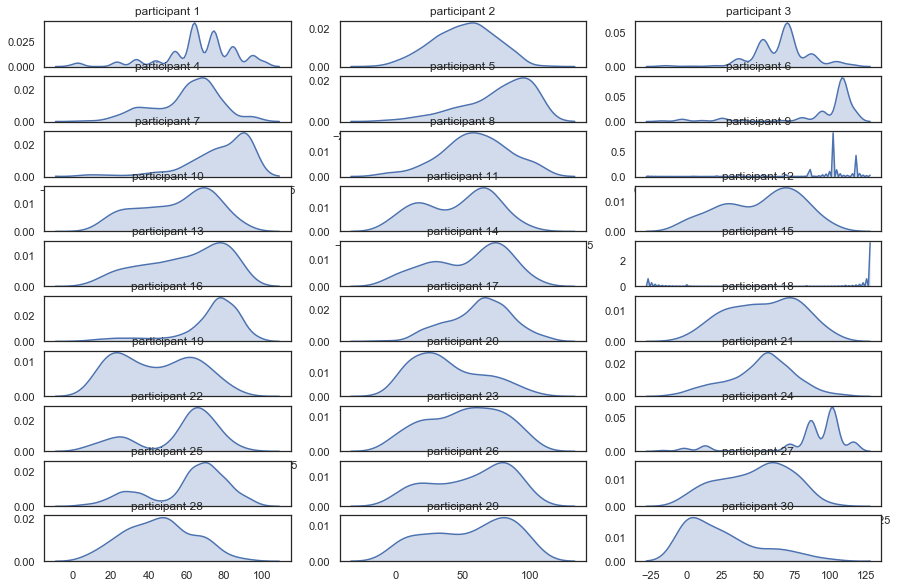

In [23]:
participant_densities(DataFrameSum1,'Conf')

### Choice RT Distributions

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


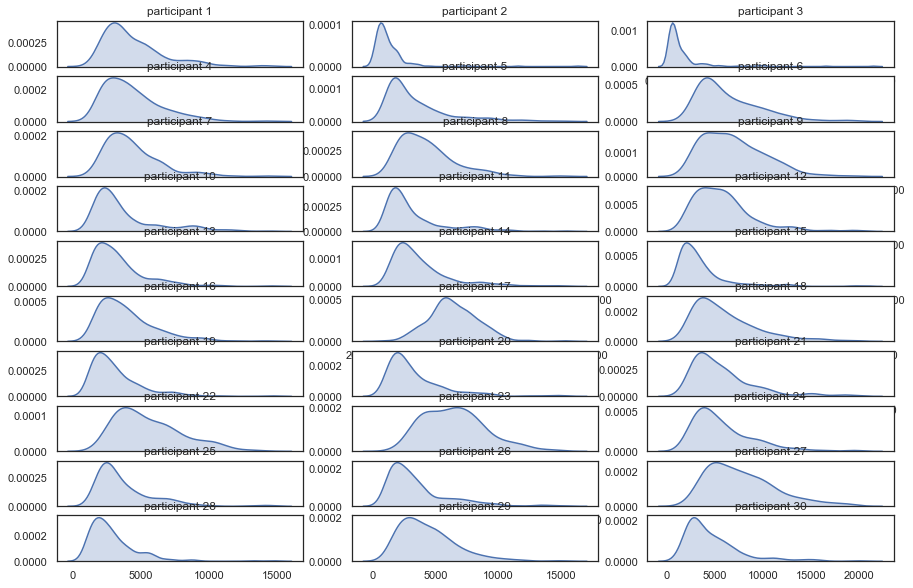

In [24]:
participant_densities(DataFrameSum1,'ChoiceRT')

## Trial DDT Distributions

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


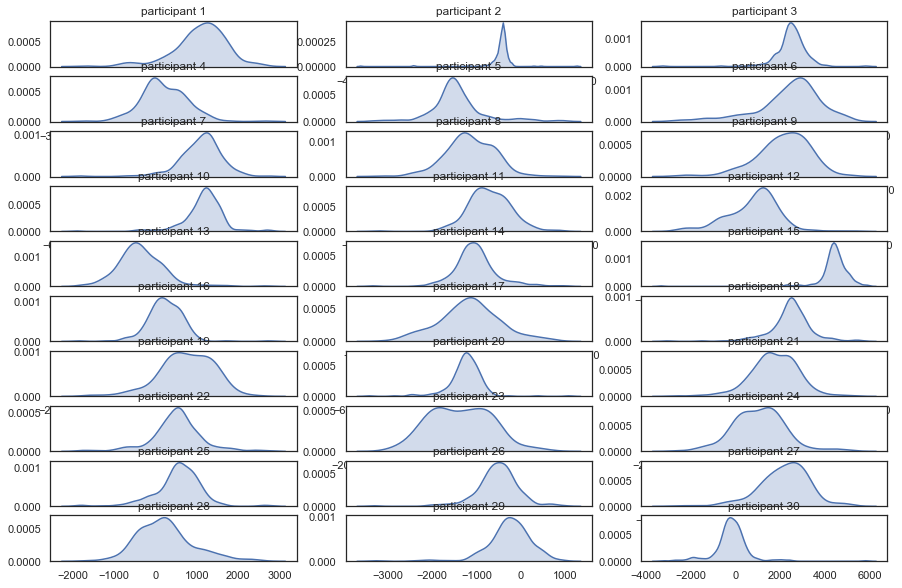

In [25]:
participant_densities(DataFrameSum1,'tDDT')

### Left and right dot density distributions
#### This shows that Left and Right items are balanced in P4 & 5 as expected

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


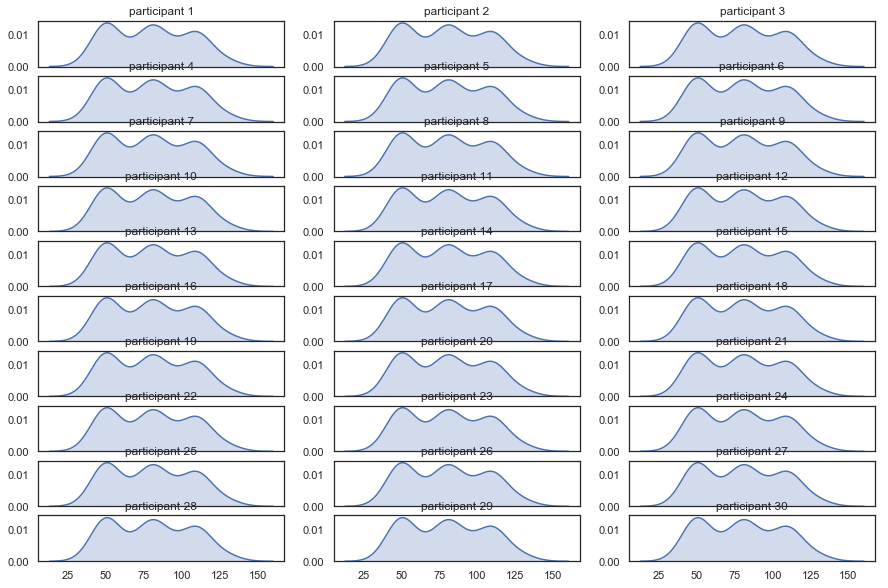

In [26]:
participant_densities(DataFrameSum1,'LValue') # Distribution of value of items

## Gaze Shift Frequencies

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


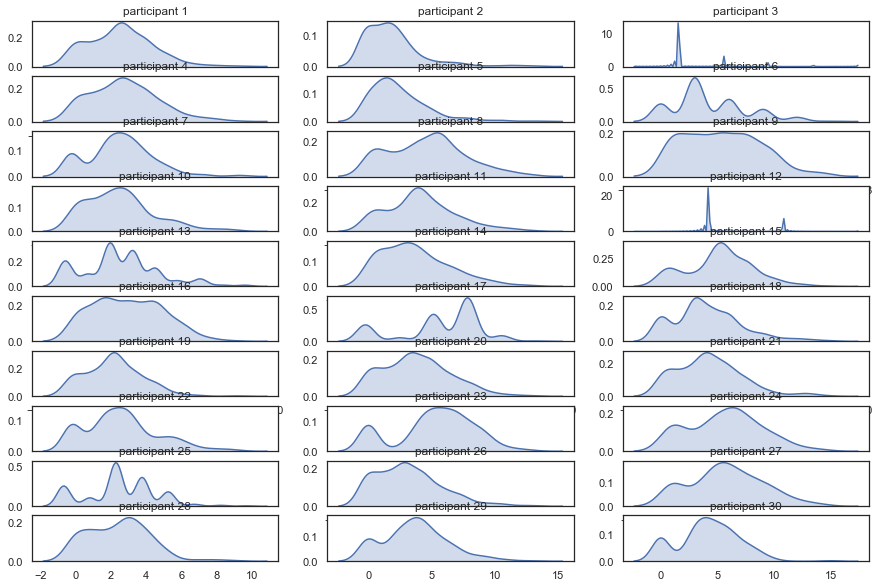

In [27]:
participant_densities(DataFrameSum1,'tGSF')

## Replace NEXTLESS for MORE and NEXTMORE for LESS 

In [53]:
DataFrameSum1['BlockCond'].unique()

array(['LESS', 'MORE'], dtype=object)

In [29]:
DataFrameSum1 = DataFrameSum1.replace('NEXTLESS', 'MORE')

In [30]:
DataFrameSum1 = DataFrameSum1.replace('NEXTMORE', 'LESS')

In [31]:
DataFrameSum1['BlockCond'].unique()

array(['LESS', 'MORE'], dtype=object)

In [32]:
list(DataFrameSum1)

['Part',
 'TrialN',
 'PairID',
 'LValue',
 'RValue',
 'ChosenITM',
 'ChoiceRT',
 'Conf',
 'ConfRT',
 'BlockCond',
 'tDDT',
 'lIA_DT',
 'rIA_DT',
 'tGSF',
 'lastFixat']

In [33]:
DataFrameSum1

,Part,TrialN,PairID,LValue,RValue,ChosenITM,ChoiceRT,Conf,ConfRT,BlockCond,tDDT,lIA_DT,rIA_DT,tGSF,lastFixat
0,1,1,49,110,131,0,4261.735,74,1584.9660000000001,LESS,-704,2114,1410,0,0
1,1,2,13,47,50,1,3559.258,54,1864.3870000000002,LESS,8,1332,1340,0,0
2,1,3,16,50,44,1,3754.4640000000004,64,3778.8070000000002,LESS,38,1272,1310,0,0
3,1,4,7,57,50,0,2431.751,84,3064.179,LESS,-587,1261,674,0,0
4,1,5,18,42,50,0,2199.342,44,2850.845,LESS,-749,1291,542,0,0
5,1,6,51,108,110,0,3269.922,44,3745.039,LESS,-697,1679,982,0,0
6,1,7,31,78,80,0,6606.698,74,2425.516,LESS,-1113,3209,2096,0,0
7,1,8,58,110,92,1,3642.1459999999997,74,3030.0009999999997,LESS,-654,1772,1118,0,0
8,1,9,12,50,48,1,5213.48,54,2229.314,LESS,59,1984,2043,0,0
9,1,10,54,110,101,1,5511.334,34,1727.761,LESS,561,2000,2561,0,0


## Add extra columns for analysis (Val Chosen/Unchosen, TotalValue,Correct)

In [34]:
ValChosen = []
ValUnChosen = []
Tot_Val = []
Correct_val = []
correct = []


for k in range(len(percpart)):
    data_part0 = DataFrameSum1.loc[(DataFrameSum1['Part'] == str(k+1))]
    trial_n = data_part0['TrialN'].unique()
    for  j in trial_n:
        data_part = DataFrameSum1.loc[(DataFrameSum1['TrialN'] == str(j) )]
        
        #Pick value left item  
        Value_L = int(data_part['LValue'].values[0])
        
        #Pick value right item
        Value_R = int(data_part['RValue'].values[0])
        
        ChosenITMtrial = int(data_part['ChosenITM'].values[0])
        BlockCondtrial = data_part['BlockCond'].values[0]
        
        if ChosenITMtrial == "1":  #Selected Item is Right
            
            ValUnChosenT  = Value_L
            ValChosenT  = Value_R
            
            if BlockCondtrial == "MORE" or BlockCondtrial == "NEXTLESS": # Block is MORE, correct chosen is higher value
                if Value_R >= Value_L:
                    correct = 1
                else: 
                    correct = 0 
            if BlockCondtrial == "LESS" or BlockCondtrial == "NEXTMORE" :# Block is LESS, correct chosen is lower value
                if Value_L >= Value_R:
                    correct = 1
                else: 
                    correct = 0  
                
        else: # Selected item is Left
            
            ValUnChosenT  = Value_R           
            ValChosenT = Value_L
            
            if BlockCondtrial == "LESS" or BlockCondtrial == "NEXTMORE": # Block is like, correct chosen is higher value
                if Value_L <= Value_R:
                    correct = 1
                else: 
                    correct = 0
            
            if BlockCondtrial == "MORE" or BlockCondtrial == "NEXTLESS":# Block is dislike, correct chosen is lower value
                if Value_R <= Value_L:
                    correct = 1
                else: 
                    correct = 0  
        
        
        ValTot = Value_L + Value_R
        
        #add to the rows with current trial measures
        
        Tot_Val.append(str(ValTot))    
        ValChosen.append(str(ValChosenT))
        ValUnChosen.append(str(ValUnChosenT))
        Correct_val.append(str(correct))
        
        #if trial_count != 3129:
        #    trial_count = trial_count + 1

In [35]:
table_aux= np.column_stack((Tot_Val, ValChosen, ValUnChosen, Correct_val))

In [36]:
New_variables = pd.DataFrame(table_aux,columns=['TotVal','ValCh','ValUnCh','Correct'])

In [37]:
data_exp1 = pd.concat([DataFrameSum1, New_variables],axis =1)

# drop first row without data
#data_exp1 = data_exp1.drop([0])
#data_exp1 = data_exp1.reset_index()

In [38]:
data_exp1

,Part,TrialN,PairID,LValue,RValue,ChosenITM,ChoiceRT,Conf,ConfRT,BlockCond,tDDT,lIA_DT,rIA_DT,tGSF,lastFixat,TotVal,ValCh,ValUnCh,Correct
0,1,1,49,110,131,0,4261.735,74,1584.9660000000001,LESS,-704,2114,1410,0,0,241,110,131,1
1,1,2,13,47,50,1,3559.258,54,1864.3870000000002,LESS,8,1332,1340,0,0,97,47,50,1
2,1,3,16,50,44,1,3754.4640000000004,64,3778.8070000000002,LESS,38,1272,1310,0,0,94,50,44,0
3,1,4,7,57,50,0,2431.751,84,3064.179,LESS,-587,1261,674,0,0,107,57,50,0
4,1,5,18,42,50,0,2199.342,44,2850.845,LESS,-749,1291,542,0,0,92,42,50,1
5,1,6,51,108,110,0,3269.922,44,3745.039,LESS,-697,1679,982,0,0,218,108,110,1
6,1,7,31,78,80,0,6606.698,74,2425.516,LESS,-1113,3209,2096,0,0,158,78,80,1
7,1,8,58,110,92,1,3642.1459999999997,74,3030.0009999999997,LESS,-654,1772,1118,0,0,202,110,92,0
8,1,9,12,50,48,1,5213.48,54,2229.314,LESS,59,1984,2043,0,0,98,50,48,0
9,1,10,54,110,101,1,5511.334,34,1727.761,LESS,561,2000,2561,0,0,211,110,101,0


## Drop rows with missing values

In [39]:
data_exp1 = data_exp1.apply(pd.to_numeric,errors='ignore')

In [40]:
# Drop row with NaN
data_exp1 = data_exp1[data_exp1.tDDT != 'nan']

In [41]:
data_exp1

,Part,TrialN,PairID,LValue,RValue,ChosenITM,ChoiceRT,Conf,ConfRT,BlockCond,tDDT,lIA_DT,rIA_DT,tGSF,lastFixat,TotVal,ValCh,ValUnCh,Correct
0,1,1,49,110,131,0,4261.735,74,1584.966,LESS,-704,2114,1410,0,0,241,110,131,1
1,1,2,13,47,50,1,3559.258,54,1864.387,LESS,8,1332,1340,0,0,97,47,50,1
2,1,3,16,50,44,1,3754.464,64,3778.807,LESS,38,1272,1310,0,0,94,50,44,0
3,1,4,7,57,50,0,2431.751,84,3064.179,LESS,-587,1261,674,0,0,107,57,50,0
4,1,5,18,42,50,0,2199.342,44,2850.845,LESS,-749,1291,542,0,0,92,42,50,1
5,1,6,51,108,110,0,3269.922,44,3745.039,LESS,-697,1679,982,0,0,218,108,110,1
6,1,7,31,78,80,0,6606.698,74,2425.516,LESS,-1113,3209,2096,0,0,158,78,80,1
7,1,8,58,110,92,1,3642.146,74,3030.001,LESS,-654,1772,1118,0,0,202,110,92,0
8,1,9,12,50,48,1,5213.480,54,2229.314,LESS,59,1984,2043,0,0,98,50,48,0
9,1,10,54,110,101,1,5511.334,34,1727.761,LESS,561,2000,2561,0,0,211,110,101,0


## 6 Calculate Z scores

In [42]:
# Calculate Z-values and other 
z_matrix=[]
z_matrix_aux=[]

for i in (data_exp1['Part'].unique()):
    Choicedata = data_exp1.loc[data_exp1['Part'] == i]
    # from v3 and on we define DV as  RIGHT - LEFT values of the items
    pX_DV = - pd.to_numeric(Choicedata["LValue"]) + pd.to_numeric(Choicedata["RValue"])
    pX_zDV = (pX_DV - np.mean(pX_DV))/np.std(pX_DV)
    
    pX_absDV = abs(- pd.to_numeric(Choicedata['LValue']) + pd.to_numeric(Choicedata['RValue']))
    pX_zAbsDV = (pX_absDV - np.mean(pX_absDV))/np.std(pX_absDV)
    
    pX_zConf = (pd.to_numeric(Choicedata['Conf']) - np.mean(pd.to_numeric(Choicedata['Conf'])))/np.std(pd.to_numeric(Choicedata['Conf']))
    
    pX_zChoiceRT = (pd.to_numeric(Choicedata['ChoiceRT'] )- np.mean(pd.to_numeric(Choicedata['ChoiceRT'])))/np.std(pd.to_numeric(Choicedata['ChoiceRT']))
   
    pX_totVal = pd.to_numeric(Choicedata['TotVal'])
    z_totVal = (pX_totVal - np.mean(pX_totVal))/np.std(pX_totVal)
    
    pX_ValChosen = pd.to_numeric(Choicedata['ValCh'])
    z_ValChosen = (pX_ValChosen - np.mean(pX_ValChosen))/np.std(pX_ValChosen)

    pX_ValUnChosen = pd.to_numeric(Choicedata['ValUnCh'])
    z_ValUnChosen = (pX_ValUnChosen - np.mean(pX_ValUnChosen))/np.std(pX_ValUnChosen)
    
    pX_tGSF = pd.to_numeric(Choicedata['tGSF'])
    z_tGSF = (pX_tGSF - np.mean(pX_tGSF))/np.std(pX_tGSF)
    
    pX_tDDT = pd.to_numeric(Choicedata['tDDT'])
    z_tDDT = (pX_tDDT - np.mean(pX_tDDT))/np.std(pX_tDDT)
    
    pX_ValR = pd.to_numeric(Choicedata['RValue'])
    zValR = (pX_ValR - np.mean(pX_ValR))/np.std(pX_ValR)
    
    
    pX_ValL = pd.to_numeric(Choicedata['LValue'])
    zValL = (pX_ValL - np.mean(pX_ValL))/np.std(pX_ValL)
    
    absDDT = abs(z_tDDT)
    
            
    z_matrix_aux= np.column_stack((pX_DV,pX_zDV,pX_absDV,pX_zAbsDV,pX_zConf,pX_zChoiceRT,
                                   z_totVal,z_ValChosen,z_ValUnChosen, z_tGSF, z_tDDT, 
                                   absDDT, zValR, zValL))
    
    for  j in range(len(z_matrix_aux)):    
        z_matrix.append(z_matrix_aux[j])

In [43]:
# Add to aggregate table
Final_head = pd.DataFrame(z_matrix, columns = ['DV','zDV','absDV','zAbsDV','zConf','zChoiceRT',
                                                  'zTotVal','zValCh','zValUnCh', 'zGSF', 'zDDT', 
                                                  'absDDT', 'zValR', 'zValL'])

In [44]:
data_exp1 = data_exp1.reset_index(drop=True)
Final_head = Final_head.reset_index(drop=True)

data_exp1 = pd.concat([data_exp1,  Final_head],axis =1)
data_exp1

,Part,TrialN,PairID,LValue,RValue,ChosenITM,ChoiceRT,Conf,ConfRT,BlockCond,...,zConf,zChoiceRT,zTotVal,zValCh,zValUnCh,zGSF,zDDT,absDDT,zValR,zValL
0,1,1,49,110,131,0,4261.735,74,1584.966,LESS,...,0.388833,1.228449,1.615547,1.170501,1.989851,-1.430827,-0.423132,0.423132,1.989851,1.170501
1,1,2,13,47,50,1,3559.258,54,1864.387,LESS,...,-0.640053,0.655295,-1.256537,-1.287551,-1.170501,-1.430827,0.913173,0.913173,-1.170501,-1.287551
2,1,3,16,50,44,1,3754.464,64,3778.807,LESS,...,-0.125610,0.814564,-1.316372,-1.170501,-1.404601,-1.430827,0.969478,0.969478,-1.404601,-1.170501
3,1,4,7,57,50,0,2431.751,84,3064.179,LESS,...,0.903277,-0.264643,-1.057086,-0.897384,-1.170501,-1.430827,-0.203543,0.203543,-1.170501,-0.897384
4,1,5,18,42,50,0,2199.342,44,2850.845,LESS,...,-1.154496,-0.454266,-1.356262,-1.482634,-1.170501,-1.430827,-0.507590,0.507590,-1.170501,-1.482634
5,1,6,51,108,110,0,3269.922,44,3745.039,LESS,...,-1.154496,0.419225,1.156812,1.092467,1.170501,-1.430827,-0.409994,0.409994,1.170501,1.092467
6,1,7,31,78,80,0,6606.698,74,2425.516,LESS,...,0.388833,3.141714,-0.039890,-0.078033,0.000000,-1.430827,-1.190757,1.190757,0.000000,-0.078033
7,1,8,58,110,92,1,3642.146,74,3030.001,LESS,...,0.388833,0.722924,0.837691,1.170501,0.468200,-1.430827,-0.329290,0.329290,0.468200,1.170501
8,1,9,12,50,48,1,5213.480,54,2229.314,LESS,...,-0.640053,2.004982,-1.236592,-1.170501,-1.248534,-1.430827,1.008892,1.008892,-1.248534,-1.170501
9,1,10,54,110,101,1,5511.334,34,1727.761,LESS,...,-1.668940,2.248002,1.017196,1.170501,0.819350,-1.430827,1.951062,1.951062,0.819350,1.170501


In [45]:
list (data_exp1)

['Part',
 'TrialN',
 'PairID',
 'LValue',
 'RValue',
 'ChosenITM',
 'ChoiceRT',
 'Conf',
 'ConfRT',
 'BlockCond',
 'tDDT',
 'lIA_DT',
 'rIA_DT',
 'tGSF',
 'lastFixat',
 'TotVal',
 'ValCh',
 'ValUnCh',
 'Correct',
 'DV',
 'zDV',
 'absDV',
 'zAbsDV',
 'zConf',
 'zChoiceRT',
 'zTotVal',
 'zValCh',
 'zValUnCh',
 'zGSF',
 'zDDT',
 'absDDT',
 'zValR',
 'zValL']

# Split the data by high/low Confidence, GSF and DDT

In [46]:
Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit']
Splits_variables = ['Conf', 'tGSF','tDDT']

In [47]:
median_matrix=[]
median_matrix_aux=[]
median_matrix_aux_cond=[]
Split_cols = []

for h in range(len(Splits_variables)):
    median_matrix=[]
    for i in unique(data_exp1["Part"]):
        median_matrix_aux=[]

        for j in unique(data_exp1["BlockCond"]):
            #median_matrix_aux_cond=[]

            #Extract data by participant and BlockCond (1: Like, 2: Dislike)
            Splitdata = data_exp1.loc[data_exp1['Part'] == i]
            Splitdata = Splitdata.loc[Splitdata['BlockCond'] == j]
            
            # Select the column to split
            Splitdata = Splitdata.loc[:,['TrialN',Splits_variables[h]]]
            SplitSort = Splitdata.values
            # Sort for confidence column
            SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
            #print(SplitSort)
            lenPart = len(Splitdata)
            #print(lenPart)
            # Generate column with median order
            median_low = [0] * int (lenPart/2)

            if len(SplitSort) != 2*len(median_low):
                median_high=  [1] * int(len(SplitSort)-len(median_low))
            else: median_high = [1] * int (lenPart/2)
            
            median_split_order = median_low + median_high
            #Attach split median order column (1 and 0)
            median_aux= np.column_stack((SplitSort,median_split_order))
            #Sort back to trial number
            SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
            #print(len(SplitSorted))
            
            for kk in range(len(SplitSorted)): 
                if len(median_matrix_aux) == 0 :
                    median_matrix_aux = SplitSorted[0]
                else:
                    median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
        
        #print(len(median_matrix_aux))
        # sort after adding both conditions    
        median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
        
        #Extract only the column with the median split information
        median_matrix_aux = median_matrix_aux[:,2]
        
        #append to median matrix for the participants
        for k in range(len(median_matrix_aux)):    
            median_matrix.append(median_matrix_aux [k])
    
    median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
    #print(len (median_matrix))
    #add new column (new split variable columns) to the split matrix
    if  h == 0:
        Split_cols = median_matrix
    else:
        Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   

In [48]:
#Join new familiarity and split datasets with the old trial information
data_exp1 = pd.concat([data_exp1,  Split_cols],axis =1)

In [49]:
data_exp1

,Part,TrialN,PairID,LValue,RValue,ChosenITM,ChoiceRT,Conf,ConfRT,BlockCond,...,zValCh,zValUnCh,zGSF,zDDT,absDDT,zValR,zValL,ConfSplit,GSFMedSplit,DDTMedSplit
0,1,1,49,110,131,0,4261.735,74,1584.966,LESS,...,1.170501,1.989851,-1.430827,-0.423132,0.423132,1.989851,1.170501,1,0,1
1,1,2,13,47,50,1,3559.258,54,1864.387,LESS,...,-1.287551,-1.170501,-1.430827,0.913173,0.913173,-1.170501,-1.287551,0,0,1
2,1,3,16,50,44,1,3754.464,64,3778.807,LESS,...,-1.170501,-1.404601,-1.430827,0.969478,0.969478,-1.404601,-1.170501,0,0,1
3,1,4,7,57,50,0,2431.751,84,3064.179,LESS,...,-0.897384,-1.170501,-1.430827,-0.203543,0.203543,-1.170501,-0.897384,1,0,1
4,1,5,18,42,50,0,2199.342,44,2850.845,LESS,...,-1.482634,-1.170501,-1.430827,-0.507590,0.507590,-1.170501,-1.482634,0,0,1
5,1,6,51,108,110,0,3269.922,44,3745.039,LESS,...,1.092467,1.170501,-1.430827,-0.409994,0.409994,1.170501,1.092467,0,0,1
6,1,7,31,78,80,0,6606.698,74,2425.516,LESS,...,-0.078033,0.000000,-1.430827,-1.190757,1.190757,0.000000,-0.078033,1,0,0
7,1,8,58,110,92,1,3642.146,74,3030.001,LESS,...,1.170501,0.468200,-1.430827,-0.329290,0.329290,0.468200,1.170501,1,0,1
8,1,9,12,50,48,1,5213.480,54,2229.314,LESS,...,-1.170501,-1.248534,-1.430827,1.008892,1.008892,-1.248534,-1.170501,0,0,1
9,1,10,54,110,101,1,5511.334,34,1727.761,LESS,...,1.170501,0.819350,-1.430827,1.951062,1.951062,0.819350,1.170501,0,0,1


# Exclusion of Participants

In [50]:
ExclusionMatrix = []
#for cycle for participant
data_exp1['Part'] = pd.to_numeric(data_exp1['Part'])
data_exp1['Conf'] = pd.to_numeric(data_exp1['Conf'])
for k in unique(data_exp1["Part"]):
    ##print(k+1)
    # Checking for confidence
    participant_data = data_exp1.loc[(data_exp1['Part'] == k)]
    ConfidencePart =participant_data['Conf']
    
    ConfRange = max(ConfidencePart) - min(ConfidencePart)
    ConfCounts = ConfidencePart.value_counts()
    
    maxConfCounts = max(ConfCounts)
    ConfCountsTotal = sum(int(i) for i in ConfCounts.values)
    
    PropnMostFreqConf = maxConfCounts / ConfCountsTotal
    PropnRangeConf = ConfRange / 100

    
    ExclusionMatrix.append([k , PropnMostFreqConf, PropnRangeConf]) 

ExclusionMatrix=pd.DataFrame(ExclusionMatrix,columns=['Participant','ProportionMostFrequentConfidence', 'ProportionRangeConfidence'])
ExclusionMatrix

#ExclusionMatrix=pd.DataFrame(ExclusionMatrix,columns=['Participant', 'ProportionMostFrequentBid', 'ProportionRangeBid','ProportionMostFrequentConfidence', 'ProportionRangeConfidence])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app


,Participant,ProportionMostFrequentConfidence,ProportionRangeConfidence
0,1,0.287500,1.00
1,2,0.241667,0.86
2,3,0.412500,0.76
3,4,0.291667,0.96
4,5,0.225000,0.96
5,6,0.566667,0.96
6,7,0.379167,1.00
7,8,0.191667,1.00
8,9,0.516667,0.96
9,10,0.204167,1.00


## To exclude participants 6, 9, 15 according to repetition of confidence criteria 

## Save data to CSV

In [51]:
#save text file with DDT and GSF for each participant/trial
data_exp1.to_csv("Output/DataPerceptualFramingNotebook_v1.csv")